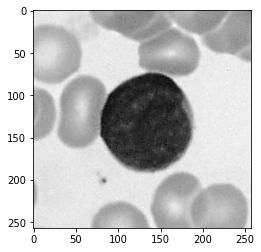

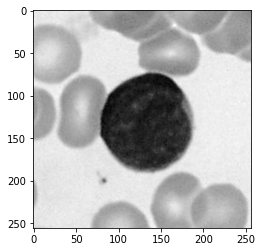

100%|██████████| 151/151 [00:41<00:00,  3.66it/s]


280
1
1
0
0
0
0
1
1
0
0
1
1
1
0
0
1
0
1
1
0
1
0
0
1
1
0
1
0
0
1
1
0
1
0
0
0
0
1
1
1
1
1
0
0
0
1
0
1
0
1
[[[[161]
   [159]
   [161]
   ...
   [142]
   [138]
   [145]]

  [[161]
   [161]
   [163]
   ...
   [140]
   [140]
   [140]]

  [[162]
   [161]
   [161]
   ...
   [137]
   [138]
   [136]]

  ...

  [[128]
   [127]
   [131]
   ...
   [160]
   [160]
   [161]]

  [[130]
   [127]
   [128]
   ...
   [161]
   [163]
   [163]]

  [[127]
   [131]
   [129]
   ...
   [162]
   [165]
   [162]]]]
Epoch 1/3


KeyboardInterrupt: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

#DATADIR="/content/drive/My Drive/ALL"
#CATEGORIES = ["all_patient", "healthy"]

DATADIR="/content/drive/My Drive/ALL2"
#TEST_DATADIR="/content/drive/My Drive/covid-19/test"
CATEGORIES = ["ALL", "healthy"]

for category in CATEGORIES:  # do covid and noncovid
    path = os.path.join(DATADIR,category)  # create path to covid and noncovid
    for img in os.listdir(path):  # iterate over each image per covid and noncovid
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

IMG_SIZE = 256
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

#creating training data

training_data = []
testing_data=[]

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
create_training_data()

print(len(training_data))

random.shuffle(training_data)
for sample in training_data[:50]:
    print(sample[1])

#Time to make our model!
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

import pickle
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)



pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
y=np.array(y)
X = X/255.0
model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)
